The Dataset is from StatsModel. It was derived from a survey of women in 1974 by Redbook magazine, in which married women were asked about their participation in extramarital affairs. More information about the study is available in a 1978 paper from the Journal of Political Economy. 
 
Description of Variables 
 
The dataset contains 6366 observations of 9 variables: 
 
rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good) 
 
age: woman's age 
 
yrs_married: number of years married 
 
children: number of children 
 
religious: woman's rating of how religious she is (1 = not religious, 4 = strongly religious) 
 
educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree) 

 
occupation: woman's occupation (1 = student, 2 = farming/semiskilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree) 
 
occupation_husb: husband's occupation (same coding as above) 
 
affairs: time spent in extra-marital affairs 

Problem Statement:-
We will treat this as a classification problem by creating a new binary variable affair (did the woman have at least one affair?) and trying to predict the classification for each woman.

In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [6]:
#Data Preprocessing
affairdata = sm.datasets.fair.load_pandas().data


In [11]:
affairdata.head(5)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [23]:
affairdata.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [12]:
#Add new column affair: 1 represents having an affair, 0 represents no affair
affairdata['affair'] = (affairdata.affairs > 0 ).astype(int)

In [13]:
#Data Exploration
affairdata.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


On average, women who have affairs rate their marriages lower, which is to be expected. 

In [15]:
affairdata.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


It seems an increase in age, yrs_married, and children appears to correlate with a declining marriage rating.

Text(0, 0.5, 'Frequency')

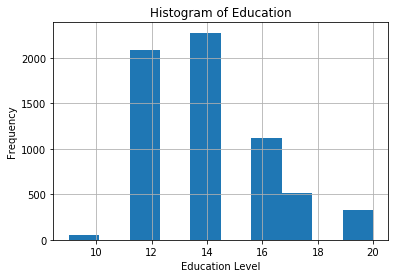

In [16]:
#Data Visualization
%matplotlib inline
affairdata.educ.hist()
plt.title("Histogram of Education")
plt.xlabel('Education Level')
plt.ylabel("Frequency")


Text(0, 0.5, 'Frequency')

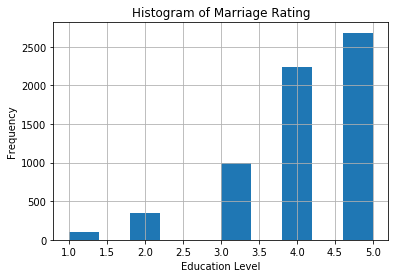

In [18]:
affairdata.rate_marriage.hist()
plt.title("Histogram of Marriage Rating")
plt.xlabel('Education Level')
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequence')

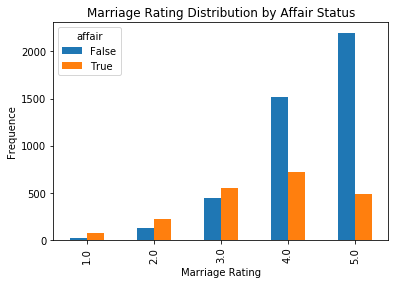

In [25]:
#Distribution of marriage ratings for those having affairs versus those not having affairs.
#Bar plot of marriage rating grouped by affair(True or False)
pd.crosstab(affairdata.rate_marriage, affairdata.affair.astype(bool)).plot(kind='bar')
plt.title("Marriage Rating Distribution by Affair Status")
plt.xlabel('Marriage Rating')
plt.ylabel("Frequence")

Text(0, 0.5, 'Percentage')

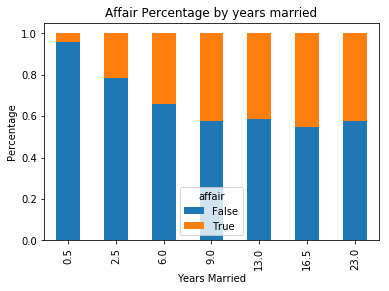

In [28]:
# stacked barplot to look at the percentage of women having affairs by number of years of marriage.
affar_yrs_married = pd.crosstab(affairdata.yrs_married, affairdata.affair.astype(bool))
affar_yrs_married.div(affar_yrs_married.sum(1).astype(float), axis = 0).plot(kind = 'bar',stacked = True)
plt.title("Affair Percentage by years married")
plt.xlabel('Years Married')
plt.ylabel("Percentage")

Prepare data for logistic regression
Add an intercept column as well as dummy variables for occupation and occupation_husb, since we are treating them as categorial variables. 
The dmatrices function from the patsy module can do that using formula language.


In [29]:
#create dataframes with intercept column and dummy variables for occupation and occupation_husb
y,X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ \
                + C(occupation) + C(occupation_husb)', affairdata, return_type = "dataframe")
print(X.columns)


Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')


In [31]:
#Rename the column names
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                       'C(occupation)[T.3.0]':'occ_3',
                       'C(occupation)[T.4.0]':'occ_4',
                       'C(occupation)[T.5.0]':'occ_5',
                       'C(occupation)[T.6.0]':'occ_6',
                       'C(occupation_husb)[T.2.0]':'occ_husb_2',
                       'C(occupation_husb)[T.3.0]':'occ_husb_3',
                       'C(occupation_husb)[T.4.0]':'occ_husb_4',
                       'C(occupation_husb)[T.5.0]':'occ_husb_5',
                       'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [32]:
#flatten y into a 1-D array
y = np.ravel(y)

In [46]:
#Run the logistic regression on the dataset
#instantiate a logistic regression model, and fit with X and y
model = LogisticRegression(solver='liblinear')
model = model.fit(X,y)
model.score(X,y)

0.7258875274897895

In [47]:
#Check the null rate error. What percentage had affairs?
y.mean()

0.3224945020420987

In [48]:
#Examine the coefficients
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))

,0,1
0,Intercept,[1.489835891324933]
1,occ_2,[0.18806639024440983]
2,occ_3,[0.4989478668156914]
3,occ_4,[0.25066856498524825]
4,occ_5,[0.8390080648117001]
5,occ_6,[0.8339084337443315]
6,occ_husb_2,[0.1906359445867889]
7,occ_husb_3,[0.2978327129263421]
8,occ_husb_4,[0.1614088540760616]
9,occ_husb_5,[0.18777091388972483]


From the above output we can say-Increases in marriage rating and religiousness correspond to a decrease in the likelihood of having an affair. 

For both the wife's occupation and the husband's occupation, the lowest likelihood of having an affair corresponds to the baseline occupation (student), since all of the dummy coefficients are positive.

In [51]:
#Model evaluation using a validation set
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state=0)
model2 = LogisticRegression(solver='liblinear')
model2.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
#Predict class labels for the test set and also generate the class probabilities.
predicted = model2.predict(X_test)
print(predicted)

[1. 0. 0. ... 0. 0. 0.]


In [53]:
probs = model2.predict_proba(X_test)
print(probs)

[[0.3514634  0.6485366 ]
 [0.90955084 0.09044916]
 [0.72567333 0.27432667]
 ...
 [0.55727385 0.44272615]
 [0.81207043 0.18792957]
 [0.74734601 0.25265399]]


The classifier is predicting a 1 (having an affair) any time the probability in the second column is greater than 0.5.

In [54]:
#Generate some evaluation metrics
print(metrics.accuracy_score(y_test,predicted))
print(metrics.roc_auc_score(y_test,probs[:,1]))

0.7298429319371728
0.745950606950631


The accuracy is 73%, which is the same as we experienced when training and predicting on the same data.

In [55]:
#Build a confusion matrix
print(metrics.confusion_matrix(y_test,predicted))
print(metrics.classification_report(y_test,predicted))

[[1169  134]
 [ 382  225]]
              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82      1303
         1.0       0.63      0.37      0.47       607

    accuracy                           0.73      1910
   macro avg       0.69      0.63      0.64      1910
weighted avg       0.71      0.73      0.71      1910



In [57]:
#Model Evaluation using cross-validation
#Evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(solver='liblinear'),X,y,scoring='accuracy',cv=10)
print(scores)
print(scores.mean())


[0.72100313 0.70219436 0.73824451 0.70597484 0.70597484 0.72955975
 0.7327044  0.70440252 0.75157233 0.75      ]
0.7241630685514876


Looks good. It's still performing at 73% accuracy.So our model is ready for prediction!